In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
import numpy as np
import requests
import json

In [3]:
# np.random.uniform:
# Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high). 
# In other words, any value within the given interval is equally likely to be drawn by uniform.

In [4]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
cities = []


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name  
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?q= CITY &APPID=031ad12ed03c53ab328ec8e6b0885922"

urls = []
for city in cities:
    x = url.replace("CITY", city)
    urls.append (x)

responses= []
for u in urls:
    response = requests.get(u).json()
    x = response
    responses.append (x)
    

In [6]:
for r in responses:
    print (r)
    print ("--"*100)

{'coord': {'lon': -70.92, 'lat': -53.15}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 272.93, 'pressure': 1026, 'humidity': 92, 'temp_min': 272.04, 'temp_max': 274.15}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 250}, 'clouds': {'all': 20}, 'dt': 1567687009, 'sys': {'type': 1, 'id': 8487, 'message': 0.0086, 'country': 'CL', 'sunrise': 1567682034, 'sunset': 1567721486}, 'timezone': -10800, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
{'coord': {'lon': -133.04, 'lat': 69.45}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 280.615, 'pressure': 1016.01, 'humidity': 85, 'temp_min': 280.615, 'temp_max': 280.615, 'sea_l

In [7]:
cities_weather_info =  []
for response in responses:
    try: 
        x = {"Latitude":response["coord"]['lat'],
             "Humidity": response["main"]["humidity"],
        "Longitude": response["coord"]['lon'], 
        "Temperature": response["main"]["temp"], 
        "Cloudiness": response["clouds"]["all"],
        "Wind Speed": response["wind"]["speed"],
        "City Name": response["name"], 
        "City id" : response["id"]}
        cities_weather_info.append (x)
    except KeyError:
        continue 


In [21]:
cities_info_df = pd.DataFrame(cities_weather_info )

In [22]:
cities_info_df.head()

,Latitude,Humidity,Longitude,Temperature,Cloudiness,Wind Speed,City Name,City id
0,-53.15,92,-70.92,272.930,20,2.60,Punta Arenas,3874787
1,69.45,85,-133.04,280.615,34,2.00,Tuktoyaktuk,6170031
2,-46.60,93,168.33,281.480,39,0.52,Bluff,2206939
3,-22.43,88,-45.45,291.110,90,2.10,Itajuba,3460834
4,-4.76,69,11.86,300.150,75,3.60,Loandjili,2258378


In [23]:
#* Temperature (F) vs. Latitude
#* Humidity (%) vs. Latitude
#* Cloudiness (%) vs. Latitude
#* Wind Speed (mph) vs. Latitude

Text(0.5, 0, 'Latitude')

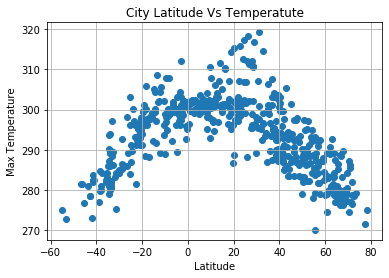

In [42]:
plt.scatter(cities_info_df["Latitude"],cities_info_df["Temperature"] )
plt.grid()
plt.title ("City Latitude Vs Temperatute")
plt.ylabel ("Max Temperature")
plt.xlabel ("Latitude")


Text(0.5, 0, 'Latitude')

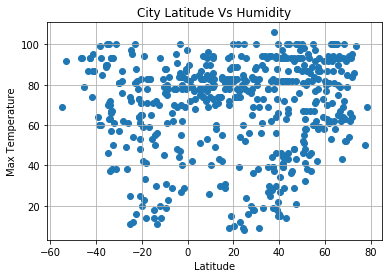

In [38]:
plt.scatter(cities_info_df["Latitude"] , cities_info_df["Humidity"])
plt.grid()

plt.title ("City Latitude Vs Humidity")
plt.ylabel ("Max Temperature")
plt.xlabel ("Latitude")

Text(0.5, 0, 'Latitude')

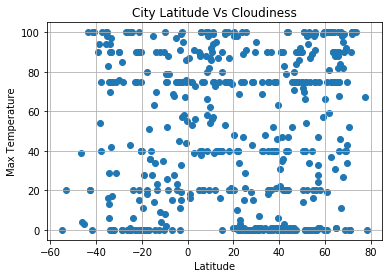

In [39]:
plt.scatter(cities_info_df["Latitude"] , cities_info_df["Cloudiness"])
plt.grid()

plt.title ("City Latitude Vs Cloudiness")
plt.ylabel ("Max Temperature")
plt.xlabel ("Latitude")

Text(0.5, 0, 'Latitude')

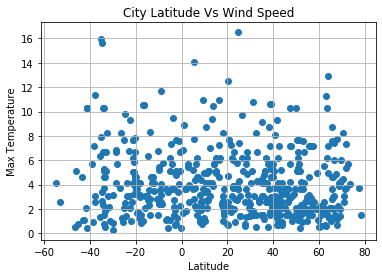

In [40]:
plt.scatter(cities_info_df["Latitude"] , cities_info_df["Wind Speed"])
plt.grid()

plt.title ("City Latitude Vs Wind Speed")
plt.ylabel ("Max Temperature")
plt.xlabel ("Latitude")